In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import  EarlyStopping
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import argparse

In [3]:
df = pd.read_csv("D:/Учёба/Магистр/1_Sem/Data Analysis/heart.csv",sep=",")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df = df.drop('chol', axis=1)
df = df.drop('fbs', axis=1)

In [5]:
mm = MinMaxScaler()
df_encoded= pd.DataFrame(mm.fit_transform(df))
df_encoded.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.708333,1.0,1.000000,0.481132,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


In [6]:
x = df_encoded
y = pd.DataFrame (df['target'], columns=['target'])

In [7]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size = 0.33)
yTrain = pd.get_dummies(data=yTrain,columns =['target'])
yTest = pd.get_dummies(data=yTest,columns =['target'])

In [12]:
model_nn = keras.Sequential([keras.layers.Dense(8,kernel_initializer = 'he_uniform',activation = 'relu'),
                            keras.layers.Dense(12,kernel_initializer = 'he_uniform',activation = 'relu'),
                            keras.layers.Dense(15,kernel_initializer = 'he_uniform',activation = 'relu'),
                            keras.layers.Dense(2,kernel_initializer = 'glorot_uniform',activation = 'sigmoid'),
                            keras.layers.Dropout(0.15)
                            ])

es = EarlyStopping(patience=3,restore_best_weights= True)

model_nn.compile(loss = "binary_crossentropy",metrics = ['accuracy'],optimizer = 'Adam')
history = model_nn.fit(xTrain,yTrain,validation_data = (xTest,yTest),epochs = 40,callbacks = es)

Epoch 1/40
7/7 [==============================] - 2s 65ms/step - loss: 1.5078 - accuracy: 0.6256 - val_loss: 0.7012 - val_accuracy: 0.6800
Epoch 2/40
7/7 [==============================] - 0s 13ms/step - loss: 1.5926 - accuracy: 0.5665 - val_loss: 0.6726 - val_accuracy: 0.6400
Epoch 3/40
7/7 [==============================] - 0s 14ms/step - loss: 1.6662 - accuracy: 0.6256 - val_loss: 0.6487 - val_accuracy: 0.6500
Epoch 4/40
7/7 [==============================] - 0s 14ms/step - loss: 1.8421 - accuracy: 0.6404 - val_loss: 0.6264 - val_accuracy: 0.6600
Epoch 5/40
7/7 [==============================] - 0s 12ms/step - loss: 1.7608 - accuracy: 0.6207 - val_loss: 0.6058 - val_accuracy: 0.7100
Epoch 6/40
7/7 [==============================] - 0s 13ms/step - loss: 1.5219 - accuracy: 0.6552 - val_loss: 0.5846 - val_accuracy: 0.7400
Epoch 7/40
7/7 [==============================] - 0s 14ms/step - loss: 1.9399 - accuracy: 0.6355 - val_loss: 0.5636 - val_accuracy: 0.7800
Epoch 8/40
7/7 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.0466 - accuracy: 1.0000
test_accuracy: 1.0


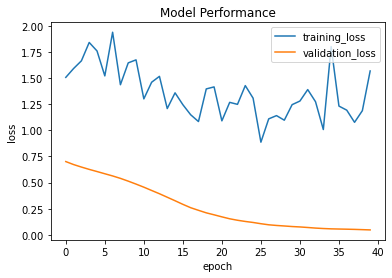

In [13]:
test_loss,test_acc= model_nn.evaluate(xTest,yTest)
print("test_accuracy:",test_acc)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Performance')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'validation_loss'], loc='upper right')
plt.show()